<a href="https://colab.research.google.com/github/Katia1697/PyE/blob/main/Unidad5/REGRESION_LINEAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

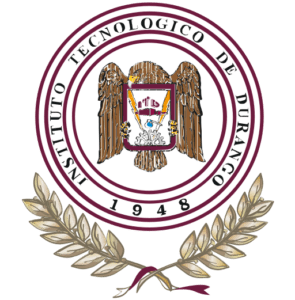
#Probabilidad y Estadistica
##Unidad 5
##REGRESION Y CORRELACION
Alumna: Katia Saucedo Perez

Profesor: Jose Gabriel Rodriguez Rivas

Grupo: 2YY

Fecha: 08/05/2025

###PRACTICA: REGRESION LINEAL SIMPLE Y MULTIPLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


REGRESION LINEAL SIMPLE ( UNA VARIABLE)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [5]:
lm = LinearRegression()

#variables independientes o variables predictoras
x = autos2[["city-mpg"]]

# Variable dependiente o variable objetivo a predecir
y = autos2[["price"]]
x.head(10)


,city-mpg
0,21
1,21
2,19
3,24
4,18
5,19
6,19
7,19
8,17
9,23


In [6]:
#Entrenar el algoritmo de regresion lineal
lm.fit(x, y)

LinearRegression()

In [7]:
#Realizamos la fase de prediccion
Ypredict = lm.predict(x)

In [9]:
#Valor de la pendiente
lm.intercept_

array([34595.60084278])

In [10]:
# valor del coeficiente o peso de la variable
lm.coef_

array([[-849.45322454]])

In [12]:
lm.score(x,y)

0.4713797473570377

##Predecir el precio de un vehiculo que tiene un rendimiento de consumo de gasolina de 24 MPG

In [13]:
Ypred = 34595.600 - 849.45 * 24

In [14]:
Ypred

14208.799999999996

In [15]:
consumos_de_3_vehiculos = [[24], [12], [8]]

In [16]:
lm.predict(consumos_de_3_vehiculos)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14208.72345381],
       [24402.16214829],
       [27799.97504646]])

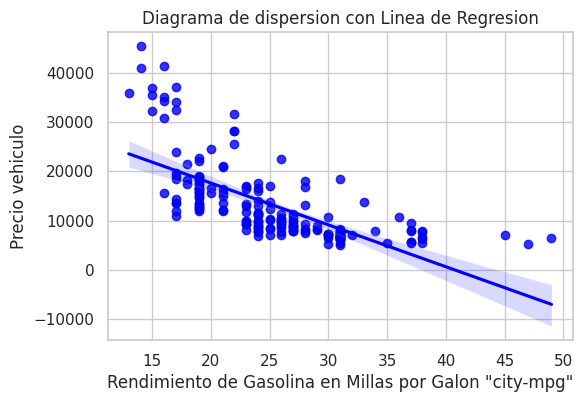

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#Definir el tamano
plt.figure(figsize=(6,4))

#Crear el diagrama de dispersion con linea de regresion
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de dispersion con Linea de Regresion')
plt.xlabel('Rendimiento de Gasolina en Millas por Galon "city-mpg"')
plt.ylabel('Precio vehiculo')
plt.grid(True)
plt.show()

##REGRESION LINEAL MULTIPLE


In [18]:
autos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [22]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "curb-weight", "price"]].corr()

,horsepower,engine-size,city-mpg,wheel-base,curb-weight,price
horsepower,1.000000,0.822668,-0.822192,0.371178,0.757981,0.809607
engine-size,0.822668,1.000000,-0.650546,0.572027,0.849072,0.872335
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.749543,-0.686571
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.782097,0.584642
curb-weight,0.757981,0.849072,-0.749543,0.782097,1.000000,0.834415
price,0.809607,0.872335,-0.686571,0.584642,0.834415,1.000000


In [ ]:
# Variables predictorias para la fase de entrenamiento